In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

/BS/orekondy/work/opt/anaconda2/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [6]:
import json
import os
from os import path as osp
import shutil

from PIL import Image, ImageDraw

In [19]:
# Generate using: http://phrogz.net/css/distinct-colors.html
colors = ['#ff0000',
 '#ffcc00',
 '#00755e',
 '#da8fff',
 '#ff8f8f',
 '#757242',
 '#00eeff',
 '#ff00cc',
 '#752f00',
 '#ccff00',
 '#00aaff',
 '#75005e',
 '#ff8800',
 '#2f7500',
 '#426475',
 '#ff8fcb',
 '#ffcb8f',
 '#bcff8f',
 '#0044ff',
 '#ff0066',
 '#755d42',
 '#00ff00',
 '#001f75',
 '#750010',
 '#754e00',
 '#00ffaa',
 '#424975',
 '#754249']

Given:
  1. VIA Annotation File
  2. Image Path
produce an overlay visualization

In [3]:
annotation_file_path = '/home/orekondy/work2/datasets/VISPR2017-seg/phase0/annotations/tribhu_40m.json'
image_path = '/home/orekondy/work2/datasets/VISPR2017-seg/phase0/images_30/2017_19010723.jpg'

In [4]:
# Obtain annotation for this image

_, img_filename = osp.split(image_path)
anno_dct = dict()   # load annotation for this file here

with open(annotation_file_path) as jf:
    dct = json.load(jf)
    
    # This is a represented as <filename><size>
    for k, v in dct.iteritems():
        if v['filename'] == img_filename:
            anno_dct = v
            break

In [5]:
anno_dct

{u'base64_img_data': u'',
 u'file_attributes': {},
 u'filename': u'2017_19010723.jpg',
 u'fileref': u'',
 u'regions': {u'0': {u'region_attributes': {},
   u'shape_attributes': {u'all_points_x': [327,
     334,
     330,
     331,
     333,
     344,
     340,
     343,
     345,
     345,
     338,
     338,
     340,
     347,
     355,
     361,
     372,
     384,
     390,
     391,
     390,
     390,
     393,
     394,
     395,
     402,
     412,
     424,
     432,
     434,
     434,
     437,
     437,
     437,
     434,
     441,
     450,
     459,
     466,
     471,
     474,
     477,
     479,
     482,
     488,
     491,
     494,
     495,
     480,
     479,
     476,
     474,
     470,
     464,
     461,
     457,
     451,
     448,
     448,
     444,
     442,
     438,
     435,
     430,
     423,
     416,
     416,
     412,
     406,
     406,
     402,
     392,
     388,
     383,
     375,
     360,
     352,
     342,
     333,
     338,
     343,


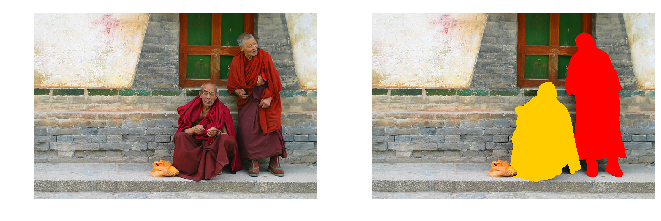

In [22]:
im = Image.open(image_path)
org_im_arr = np.asarray(im)

for idx, (region_id, region_dct) in enumerate(anno_dct['regions'].iteritems()):
    xy_list = zip(region_dct['shape_attributes']['all_points_x'], region_dct['shape_attributes']['all_points_y'])
    draw = ImageDraw.Draw(im)
    draw.polygon(xy_list, outline=None, fill=colors[idx])
    del draw

plt.subplot(121)
plt.axis('off')
plt.imshow(org_im_arr)
plt.subplot(122)
plt.axis('off')
plt.imshow(im)

In [24]:
im.size

(670, 442)

In [28]:
x = 'a0_safe_2017_15285423.jpg'

In [29]:
x.index('2017')

8

In [31]:
p = x.split('2017')[0]

In [32]:
x.replace(p, '')

'2017_15285423.jpg'

In [33]:
x

'a0_safe_2017_15285423.jpg'

In [34]:
5/2

2

In [35]:
5//2

2

In [36]:
l = '#ff004d, #a6afff, #ffe600, #915e6e, #0066ff, #918300, #ff0099, #00b3ff, #ff9900, #910057, #00ffff, #ffdba6, #ff00e5, #009191, #917d5e, #ffa6f6, #b8ffa6, #ff4d00, #740091, #69915e, #ffc1a6, #785e91, #7fff00, #910000, #3300ff, #499100, #ffa6a6'

In [37]:
l

'#ff004d, #a6afff, #ffe600, #915e6e, #0066ff, #918300, #ff0099, #00b3ff, #ff9900, #910057, #00ffff, #ffdba6, #ff00e5, #009191, #917d5e, #ffa6f6, #b8ffa6, #ff4d00, #740091, #69915e, #ffc1a6, #785e91, #7fff00, #910000, #3300ff, #499100, #ffa6a6'

In [38]:
l.split(', ')

['#ff004d',
 '#a6afff',
 '#ffe600',
 '#915e6e',
 '#0066ff',
 '#918300',
 '#ff0099',
 '#00b3ff',
 '#ff9900',
 '#910057',
 '#00ffff',
 '#ffdba6',
 '#ff00e5',
 '#009191',
 '#917d5e',
 '#ffa6f6',
 '#b8ffa6',
 '#ff4d00',
 '#740091',
 '#69915e',
 '#ffc1a6',
 '#785e91',
 '#7fff00',
 '#910000',
 '#3300ff',
 '#499100',
 '#ffa6a6']